In [62]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data_to_load)
clinical_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset

combined_mouse_trial = pd.merge(clinical_df, mouse_drug_df,
                                 how='outer', on='Mouse ID')


# Display the data table for preview

combined_mouse_trial.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [63]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

mean_TV = combined_mouse_trial.groupby(['Drug', 'Timepoint']).mean()

# new = combined_mouse_trial.groupby('Drug')['Tumor Volume (mm3)'].mean()

pd.DataFrame(mean_TV)
mean_TV = mean_TV.drop(columns=['Metastatic Sites'])

pd.DataFrame(mean_TV)

mean_TV = mean_TV.reset_index()

mean_TV




,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [65]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

sem = combined_mouse_trial.groupby(['Drug', 'Timepoint']).sem()

# Convert to DataFrame

pd.DataFrame(sem)

#remove Extra Columns
sem = sem.drop(columns=['Metastatic Sites', 'Mouse ID'])

sem.rename(columns={'Tumor Volume (mm3)': 'Tumor Vol S.E.M. (mm3)'})

#Reset Index
sem.reset_index()



# Preview DataFrame


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [66]:
# Minor Data Munging to Re-Format the Data Frames

# Pivot Table for Mean Tumor Volume
mean_pivot = pd.pivot_table(mean_TV, values='Tumor Volume (mm3)', index=['Timepoint'], columns=['Drug'])

# Pivot Table for Mean S.E.M.
mean_sem = pd.pivot_table(sem, values='Tumor Volume (mm3)', index=['Timepoint'], columns=['Drug'])

# Preview that Reformatting worked

pd.DataFrame(mean_pivot)



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


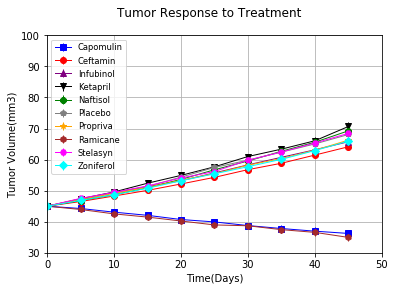

In [67]:
# Generate the Plot (with Error Bars)

pd.DataFrame(mean_sem)

fig, ax = plt.subplots()

fig.suptitle("Tumor Response to Treatment", fontsize=12)

ax.set_xlim(0, 50) 
ax.set_ylim(30, 100)

ax.set_xlabel("Time(Days)") 
ax.set_ylabel("Tumor Volume(mm3)")

# x_axis = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
x_axis = mean_pivot.index


Capomulin = plt.errorbar(x_axis, mean_pivot["Capomulin"], yerr=(mean_sem["Capomulin"]), marker="s", color="blue", elinewidth=1, linewidth=1)

Ceftamin = plt.errorbar(x_axis, mean_pivot["Ceftamin"], yerr=(mean_sem["Ceftamin"]), marker="o", color="red", elinewidth=1, linewidth=1)

Infubinol = plt.errorbar(x_axis, mean_pivot["Infubinol"], yerr=(mean_sem["Infubinol"]), marker="^", color="purple", elinewidth=1, linewidth=1)

Ketapril = plt.errorbar(x_axis, mean_pivot["Ketapril"], yerr=(mean_sem["Ketapril"]), marker="v", color="black", elinewidth=1, linewidth=1)

Naftisol = plt.errorbar(x_axis, mean_pivot["Naftisol"], yerr=(mean_sem["Naftisol"]), marker="8", color="green", elinewidth=1, linewidth=1)

Placebo = plt.errorbar(x_axis, mean_pivot["Placebo"], yerr=(mean_sem["Placebo"]), marker="p", color="gray", elinewidth=1, linewidth=1)

Propriva = plt.errorbar(x_axis, mean_pivot["Propriva"], yerr=(mean_sem["Propriva"]), marker="*", color="orange", elinewidth=1, linewidth=1)

Ramicane = plt.errorbar(x_axis, mean_pivot["Ramicane"], yerr=(mean_sem["Ramicane"]), marker="h", color="brown", elinewidth=1, linewidth=1)

Stelasyn = plt.errorbar(x_axis, mean_pivot["Stelasyn"], yerr=(mean_sem["Stelasyn"]), marker="H", color="magenta", elinewidth=1, linewidth=1)

Zoniferol = plt.errorbar(x_axis, mean_pivot["Zoniferol"], yerr=(mean_sem["Zoniferol"]), marker="D", color="cyan", elinewidth=1, linewidth=1)

# ax.plot(x_axis, mean_pivot, linewidth=1, marker="s")
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.grid()

#Save Figure
plt.savefig("Images/TumorResponse.png")

plt.show()



In [87]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [68]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

mean_mets = combined_mouse_trial.groupby(['Drug', 'Timepoint']).mean()



# Convert to DataFrame

pd.DataFrame(mean_mets)

mean_mets = mean_mets.drop(columns=["Tumor Volume (mm3)"])

pd.DataFrame(mean_mets)

mean_mets = mean_mets.reset_index()


# Preview DataFrame
mean_mets

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
5,Capomulin,25,0.818182
6,Capomulin,30,1.090909
7,Capomulin,35,1.181818
8,Capomulin,40,1.380952
9,Capomulin,45,1.476190


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [69]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

met_sem = combined_mouse_trial.groupby(['Drug', 'Timepoint']).sem()
# Convert to DataFrame

pd.DataFrame(met_sem)
met_sem = met_sem.drop(columns=['Tumor Volume (mm3)', 'Mouse ID'])

met_sem.rename(columns={'Tumor Volume (mm3)': 'Tumor Vol S.E.M. (mm3)'})



# Preview DataFrame

met_sem.reset_index()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
5,Capomulin,25,0.181818
6,Capomulin,30,0.172944
7,Capomulin,35,0.169496
8,Capomulin,40,0.175610
9,Capomulin,45,0.202591


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [70]:
# Minor Data Munging to Re-Format the Data Frames

mets_pivot = pd.pivot_table(mean_mets, values='Metastatic Sites', index=['Timepoint'], columns=['Drug'])

metsem_pivot = pd.pivot_table(met_sem, values='Metastatic Sites', index=['Timepoint'], columns=['Drug'])


# Preview that Reformatting worked

pd.DataFrame(mets_pivot)





Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


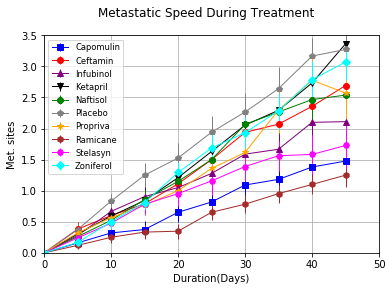

In [73]:
# Generate the Plot (with Error Bars)

pd.DataFrame(metsem_pivot)

fig, ax = plt.subplots()

fig.suptitle("Metastatic Speed During Treatment", fontsize=12)

ax.set_xlim(0, 50) 
ax.set_ylim(0, 3.5)

ax.set_xlabel("Duration(Days)") 
ax.set_ylabel("Met. sites")

# x_axis = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
x_axis = mets_pivot.index


Capomulin = plt.errorbar(x_axis, mets_pivot["Capomulin"], yerr=(metsem_pivot["Capomulin"]), marker="s", color="blue", elinewidth=1, linewidth=1)

Ceftamin = plt.errorbar(x_axis, mets_pivot["Ceftamin"], yerr=(metsem_pivot["Ceftamin"]), marker="o", color="red", elinewidth=1, linewidth=1)

Infubinol = plt.errorbar(x_axis, mets_pivot["Infubinol"], yerr=(metsem_pivot["Infubinol"]), marker="^", color="purple", elinewidth=1, linewidth=1)

Ketapril = plt.errorbar(x_axis, mets_pivot["Ketapril"], yerr=(metsem_pivot["Ketapril"]), marker="v", color="black", elinewidth=1, linewidth=1)

Naftisol = plt.errorbar(x_axis, mets_pivot["Naftisol"], yerr=(metsem_pivot["Naftisol"]), marker="8", color="green", elinewidth=1, linewidth=1)

Placebo = plt.errorbar(x_axis, mets_pivot["Placebo"], yerr=(metsem_pivot["Placebo"]), marker="p", color="gray", elinewidth=1, linewidth=1)

Propriva = plt.errorbar(x_axis, mets_pivot["Propriva"], yerr=(metsem_pivot["Propriva"]), marker="*", color="orange", elinewidth=1, linewidth=1)

Ramicane = plt.errorbar(x_axis, mets_pivot["Ramicane"], yerr=(metsem_pivot["Ramicane"]), marker="h", color="brown", elinewidth=1, linewidth=1)

Stelasyn = plt.errorbar(x_axis, mets_pivot["Stelasyn"], yerr=(metsem_pivot["Stelasyn"]), marker="H", color="magenta", elinewidth=1, linewidth=1)

Zoniferol = plt.errorbar(x_axis, mets_pivot["Zoniferol"], yerr=(metsem_pivot["Zoniferol"]), marker="D", color="cyan", elinewidth=1, linewidth=1)

# ax.plot(x_axis, mean_pivot, linewidth=1, marker="s")
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.grid()


# Save the Figure
plt.savefig("Images/MetastaticResponse.png")


# Show the Figure
plt.show()

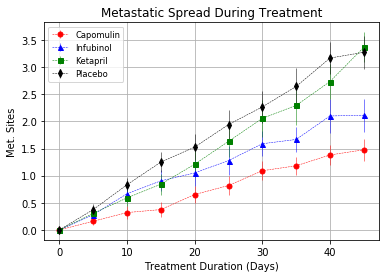

## Survival Rates

In [74]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

mouse_count = combined_mouse_trial.groupby(['Drug', 'Timepoint']).count()

# Convert to DataFrame
pd.DataFrame(mouse_count)
mouse_count = mouse_count.drop(columns=['Metastatic Sites', "Tumor Volume (mm3)"])

pd.DataFrame(mouse_count)

mouse_count = mouse_count.rename(columns={'Mouse ID': 'Mouse Count'})

mouse_count = mouse_count.reset_index()


# Preview DataFrame
mouse_count

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
5,Capomulin,25,22
6,Capomulin,30,22
7,Capomulin,35,22
8,Capomulin,40,21
9,Capomulin,45,21


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [76]:
# Minor Data Munging to Re-Format the Data Frames

count_pivot = pd.pivot_table(mouse_count, values='Mouse Count', index=['Timepoint'], columns=['Drug'])



# Preview that Reformatting worked

pd.DataFrame(count_pivot)


# Preview the Data Frame



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [78]:
perc_count = count_pivot/(count_pivot.iloc[0,:])*100

perc_count

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.153846,100.0,96.153846,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.461538,96.0,88.461538,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.384615,96.0,88.461538,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.384615,92.0,80.769231,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,53.846154,92.0,73.076923,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,50.000000,92.0,69.230769,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,38.461538,84.0,61.538462,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,34.615385,80.0,46.153846,56.0


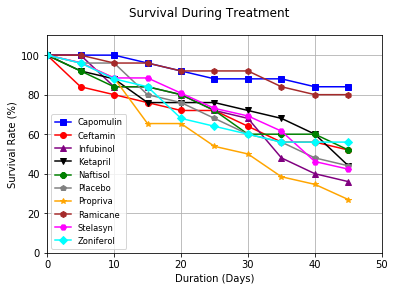

In [80]:
# Generate the Plot (Accounting for percentages)

fig, ax = plt.subplots()

x_axis = perc_count.index


fig.suptitle("Survival During Treatment", size=12)

ax.set_xlim(0, 50) 
ax.set_ylim(0, 110)


# x_axis = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

ax.set_xlabel("Duration (Days)")
ax.set_ylabel("Survival Rate (%)")

# Capomulin = plt.errorbar(x_axis, count_pivot["Capomulin"], yerr=(metsem_pivot["Capomulin"]), marker="s", color="blue", elinewidth=1, linewidth=1)

Capomulin = plt.plot(x_axis, perc_count["Capomulin"], color="blue", marker="s")

Ceftamin = plt.plot(x_axis, perc_count["Ceftamin"], color="red", marker="o")

Infubinol = plt.plot(x_axis, perc_count["Infubinol"], marker="^", color="purple")

Ketapril = plt.plot(x_axis, perc_count["Ketapril"], marker="v", color="black")

Naftisol = plt.plot(x_axis, perc_count["Naftisol"], marker="8", color="green")

Placebo = plt.plot(x_axis, perc_count["Placebo"], marker="p", color="gray")

Propriva = plt.plot(x_axis, perc_count["Propriva"], marker="*", color="orange")

Ramicane = plt.plot(x_axis, perc_count["Ramicane"], marker="h", color="brown")

Stelasyn = plt.plot(x_axis, perc_count["Stelasyn"], marker="H", color="magenta")

Zoniferol = plt.plot(x_axis, perc_count["Zoniferol"], marker="D", color="cyan")


plt.legend(loc="best", fontsize="small", fancybox=True)
plt.grid()

plt.savefig("Images/Survival.png")

plt.show()



# Show the Figure
plt.show()

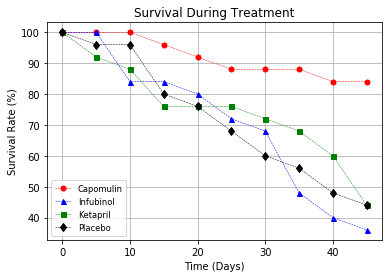

## Summary Bar Graph

In [81]:
# Calculate the percent changes for each drug

change = ((mean_pivot.iloc[9,:]-mean_pivot.iloc[0,:])/mean_pivot.iloc[0,:])*100


# Display the data to confirm
change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

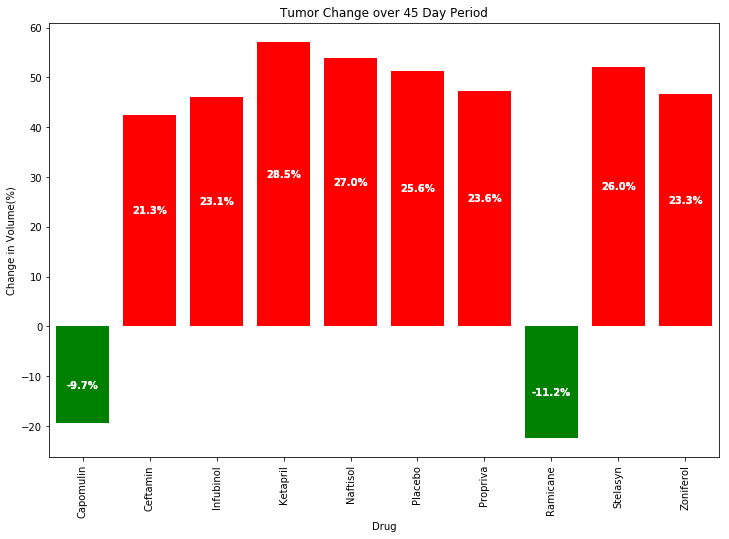

<Figure size 432x288 with 0 Axes>

In [82]:
# Store all Relevant Percent Changes into a Tuple
import matplotlib.pyplot as plt

pd.DataFrame(change)

growth = tuple(change)


drug = tuple(change.index)


# Splice the data between passing and failing drugs

# x_axis = np.arange(len(drug))

# plt.bar(x_axis, growth, color="r", align="center")



# mask = growth < 0

# colors[mask.values] = 'g'

plt.figure(figsize=(12, 8))
ax = change.plot(kind='bar')
ax.set_title('Tumor Change over 45 Day Period')
ax.set_xlabel('Drug')
ax.set_ylabel('Change in Volume(%)')
ax.set_xticklabels(drug, rotation='vertical')

x = np.arange(len(drug))
y = change

mask1 = y < 1
mask2 = y >= 0

plt.bar(x[mask1], y[mask1], color = 'green')
plt.bar(x[mask2], y[mask2], color = 'red')

# plt.xticks(x, drug, rotation='vertical')


rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()/2
    x_value = rect.get_x() + rect.get_width() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    va = 'bottom'

    # If value of bar is negative: Place label below bar
    if y_value < 0:
        # Invert space to place label below
        space *= -1
        # Vertically align label at top
        va = 'top'

    # Use Y value as label and format number with one decimal place
    label = "{:.1f}%".format(y_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(0, space),
        color = "white",
        fontweight='bold',                # Vertically shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        ha='center',                # Horizontally center label
        va=va)                      # Vertically align label differently for
                                    # positive and negative values.


plt.savefig("Images/DrugPerformance.png")
plt.show()
plt.tight_layout()

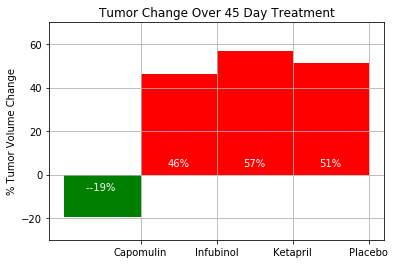